# TELECOM CHURN MANAGEMENT - Segmentation - Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

%matplotlib inline
sns.set_style('whitegrid')

C:\Users\hp\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\hp\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\hp\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\hp\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\hp\Anaconda3\lib\site

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Importing the Dataset

In [3]:
active = pd.read_excel('Case_study_data.xlsx',sheet_name='Active Customers ')
churned = pd.read_excel('Case_study_data.xlsx',sheet_name='Churn Customers')

In [4]:
active.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [5]:
active.rename(columns={'SERVICE_ PLAN':'SERVICE_PLAN'},inplace=True)

In [6]:
churned.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

## 1. Since the active and churned datasets are similar 
            - just the churned dataset has an extra column churn_date
            - make a new varibale for Account_Status of binary datatype where,
            - make a new varibale for Account_Status of binary datatype where,
                - active=0
                - churned=1
            - create the combined dataset

In [7]:
active['Churned']=0

In [369]:
churned['Churned']=1

    - Create a new dataset for churned withouitbthye churned date to join active and churned datasets

In [370]:
churned_n=churned.drop(columns={'CHURN_DATE'})

In [371]:
data = active.append(churned_n)

>here, data is the combined dataset 

## 2. Data Analysis

> ### a.Create generalised variables for the First communication date amd Upgrade date 
    - Since, date will have high cardinality
    - just keep the years

In [372]:
data['First_comm_year'] = data['FIRST_COMMUNICATION_DATE'].dt.year

In [373]:
data['Upgrade_year']=data['UPGRADE_DATE'].dt.year

In [374]:
data.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'Churned', 'First_comm_year', 'Upgrade_year'],
      dtype='object')

> ### b. Create a profile Report

In [375]:
pandas_profiling.ProfileReport(data)

Number of variables,33
Number of observations,19999
Total Missing (%),4.9%
Total size in memory,5.0 MiB
Average record size in memory,264.0 B
Numeric,4
Categorical,23
Boolean,1
Date,2
Text (Unique),1
Rejected,1


> ### c. Drop columns not required
    - ADDRESS,CITY,ZIPCODE,AGE have high cardinality
    - EMAIL , FIRST_NAME, LAST_NAME , DOB are all different for each customer
    - WARRANTY_NAME has most of its values '0'
    - First_comm_year highly correlated with upgrade year

In [376]:
drop_col =['ACCOUNT_STATUS','AGE','FIRST_COMMUNICATION_DATE','UPGRADE_DATE','ADDRESS','CITY','ZIPCODE','EMAIL_ADDRESS','FIRST_NAME','LAST_NAME','DATE_OF_BIRTH','WARRANTY_NAME']

In [377]:
data.drop(columns=drop_col,inplace=True)

> ### d. Univariate Analysis of each Factor with respect to churn Varible


    - create a function to check the variation of each factor with churn variable

In [378]:
def histplot(x):
    sns.countplot(x,hue=data['Churned'])
    plt.plot()

    - create a list of not required variables to drop them 

In [379]:
ir_rel_var = []

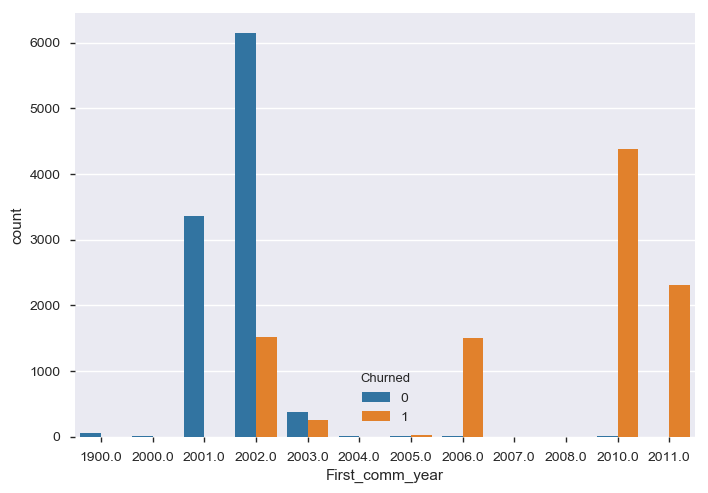

In [380]:
histplot(data['First_comm_year'])

    - First Communication year has a definite impact on churn variable

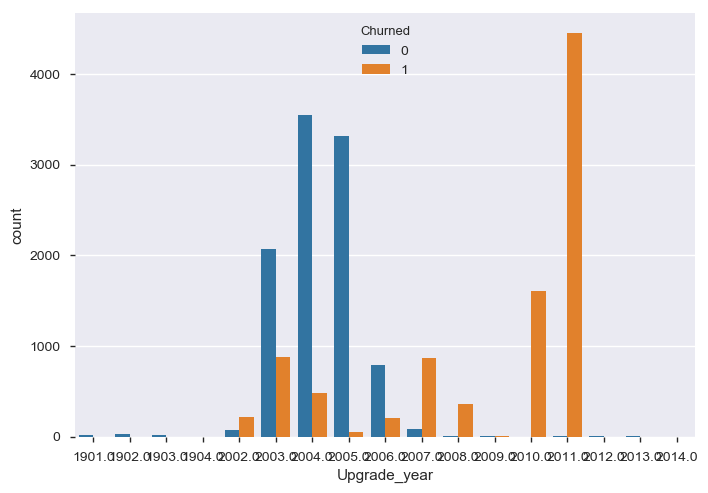

In [381]:
histplot(data['Upgrade_year'])

    - Upgrade year has  impact on churn variable
>Customers with recent Upgrade years have higj churn ,
- thus, old customers can be preferred

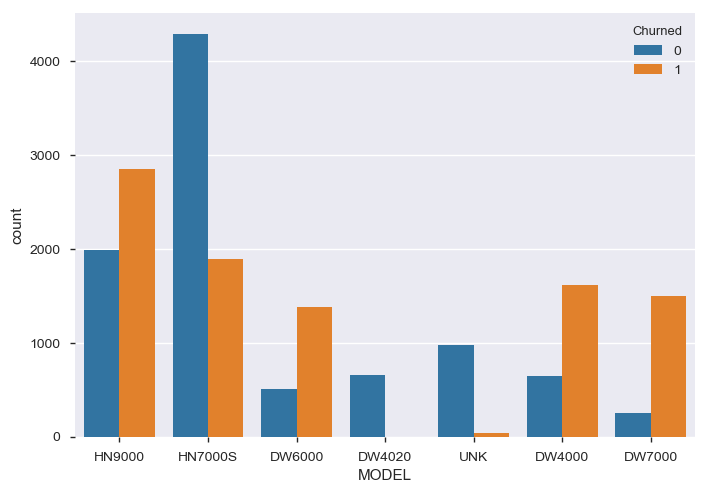

In [382]:
histplot(data['MODEL'])

    - Model has not much imapct,so drop it

In [383]:
ir_rel_var.append('MODEL')

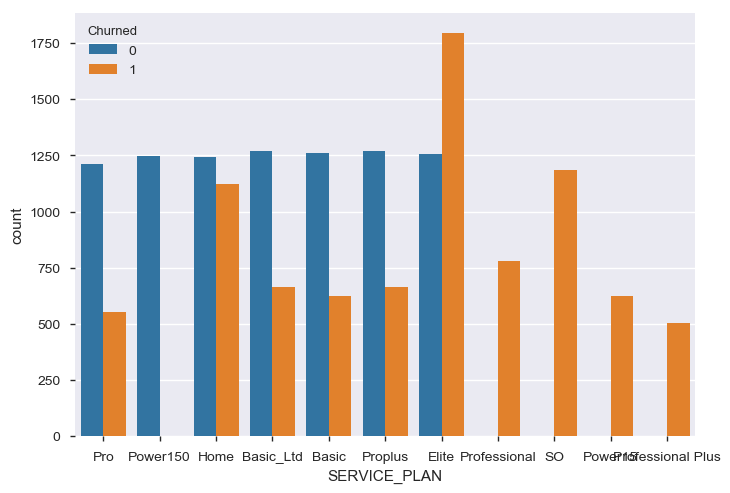

In [384]:
histplot(data['SERVICE_PLAN'])

    - Service plan has a impact
> Elite Service Plan have highesyt churn,while professional,so,power plus,professional plus have 100% churn
- thus such customers need not be preferred as they will definitely churn

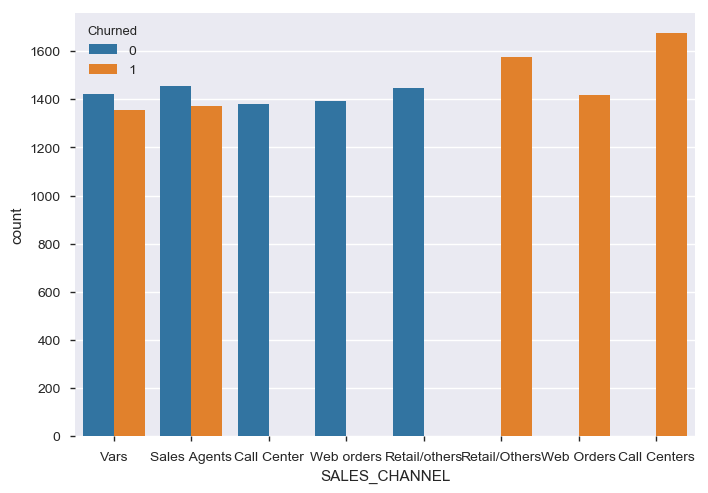

In [385]:
histplot(data['SALES_CHANNEL'])

    - Sales channel has impact

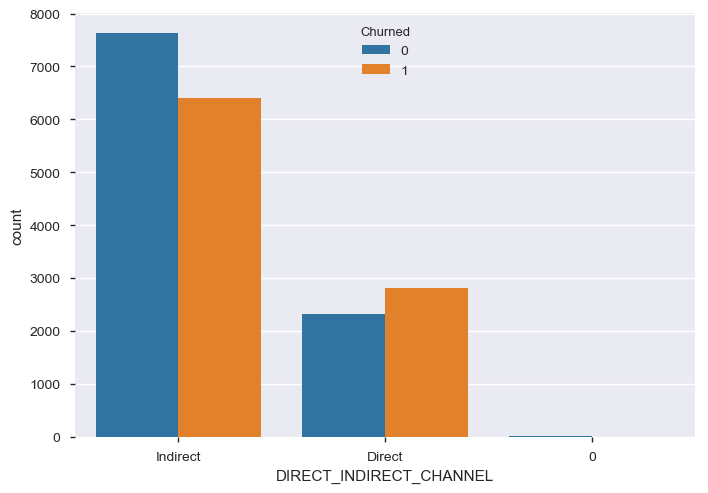

In [386]:
histplot(data['DIRECT_INDIRECT_CHANNEL'])

    - not required,drop it

In [387]:
ir_rel_var.append('DIRECT_INDIRECT_CHANNEL')

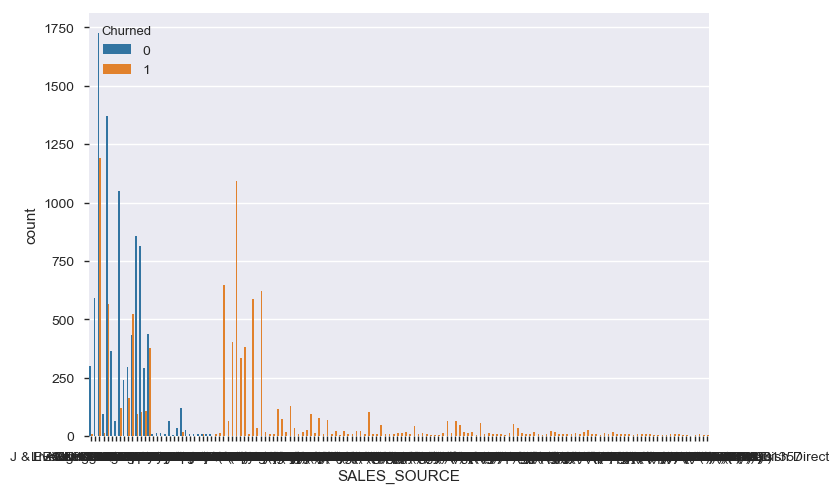

In [388]:
histplot(data['SALES_SOURCE'])

    - can be used in analysis after binning or labelencoding

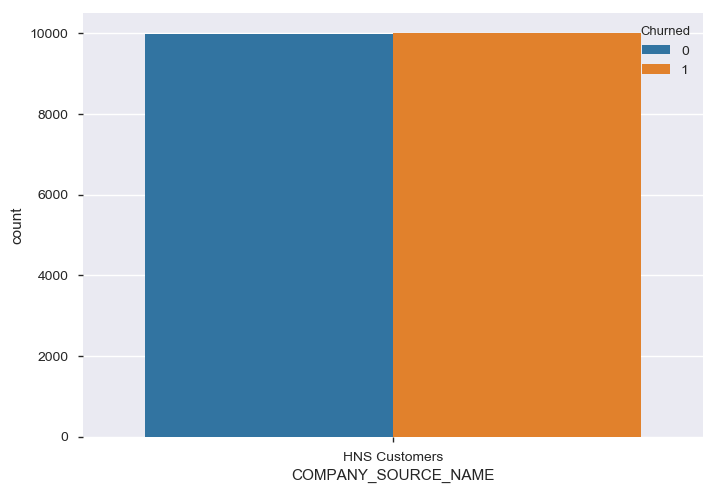

In [389]:
histplot(data['COMPANY_SOURCE_NAME'])

    - Since,it has single value,it can be dropped

In [390]:
ir_rel_var.append('COMPANY_SOURCE_NAME')

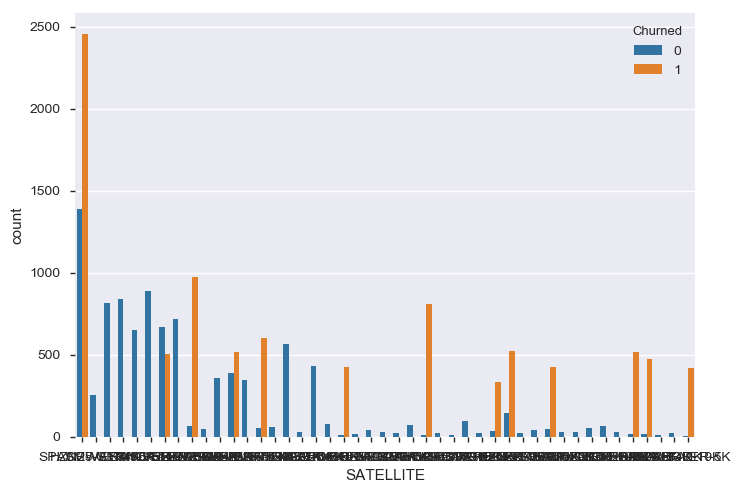

In [391]:
histplot(data['SATELLITE'])

    - Can be used after binning

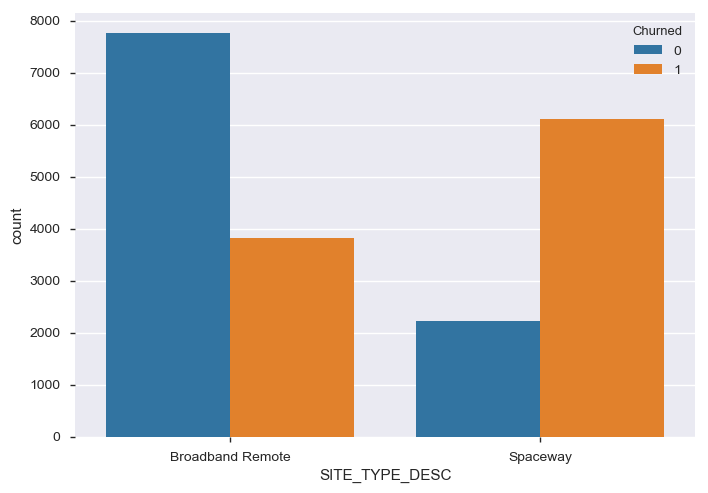

In [392]:
histplot(data['SITE_TYPE_DESC'])

    - spaceway has more churn than broadband remote

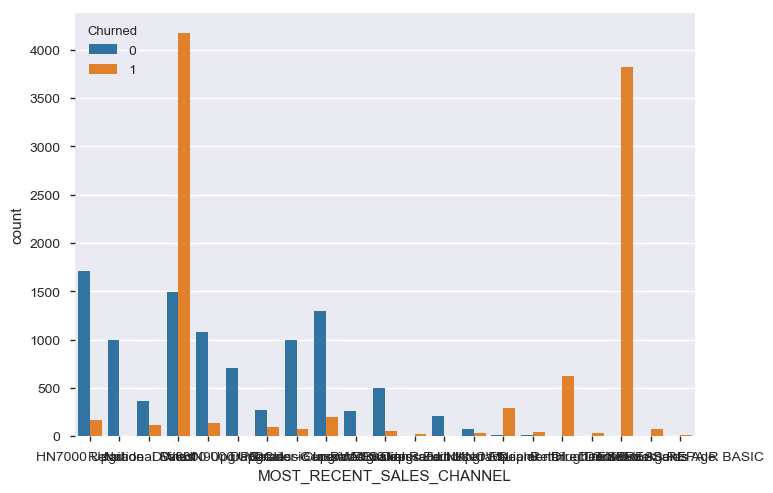

In [393]:
histplot(data['MOST_RECENT_SALES_CHANNEL'])

    - Some of the Sales chjannel has a very high churn rate,

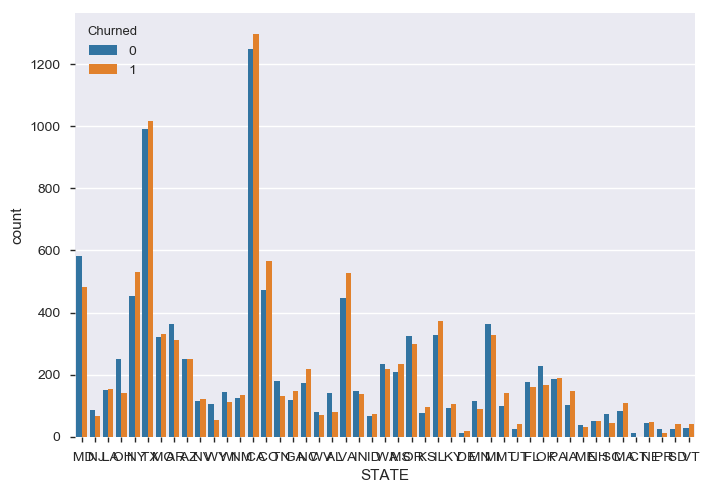

In [394]:
histplot(data['STATE'])

    - Can be dropped as uniforn churn rate

In [395]:
ir_rel_var.append('STATE')

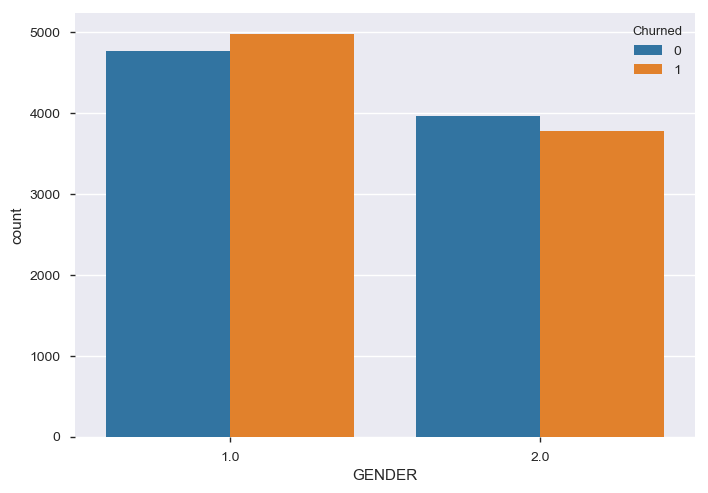

In [396]:
histplot(data['GENDER'])

    - Not much effective,drop it

In [397]:
ir_rel_var.append('GENDER')

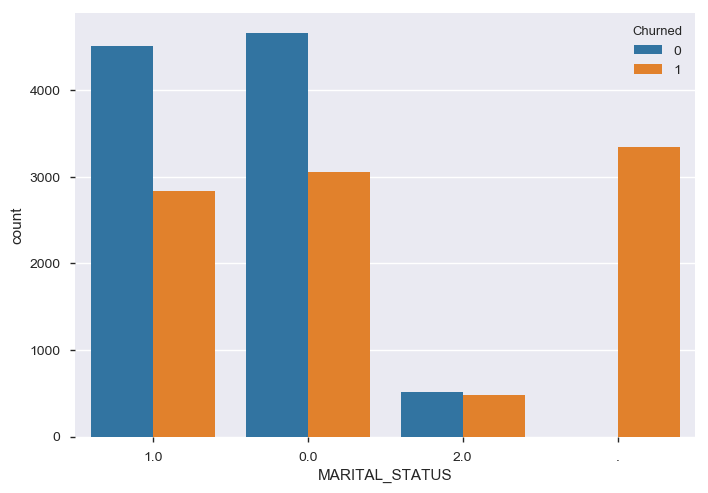

In [398]:
histplot(data['MARITAL_STATUS'])

    - needs to be rechecked after removing null values

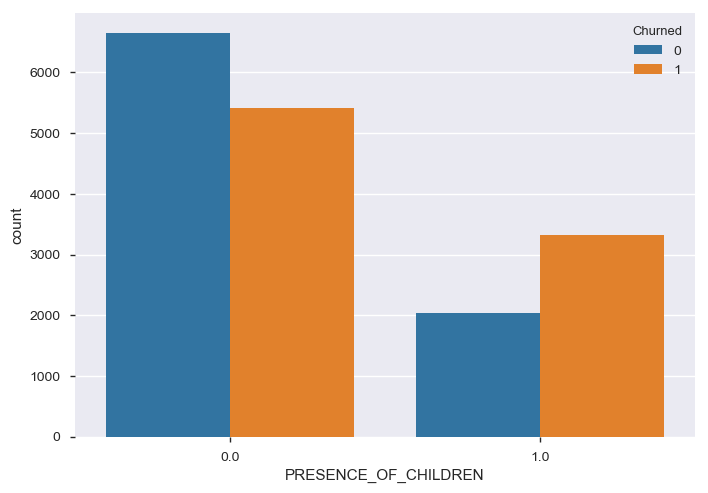

In [399]:
histplot(data['PRESENCE_OF_CHILDREN'])

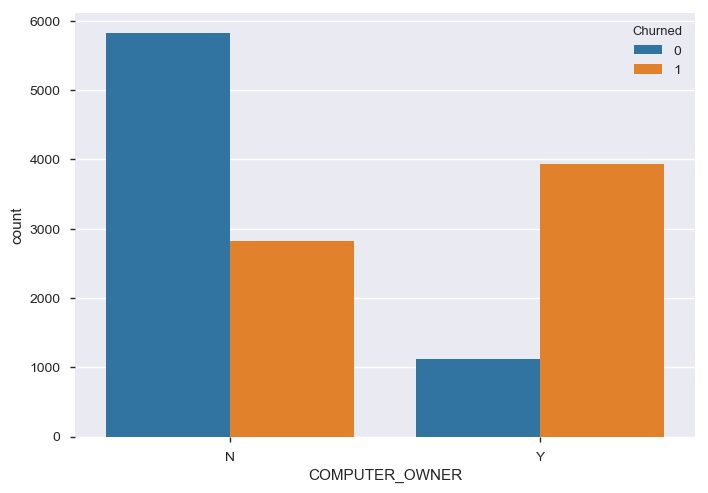

In [400]:
histplot(data['COMPUTER_OWNER'])

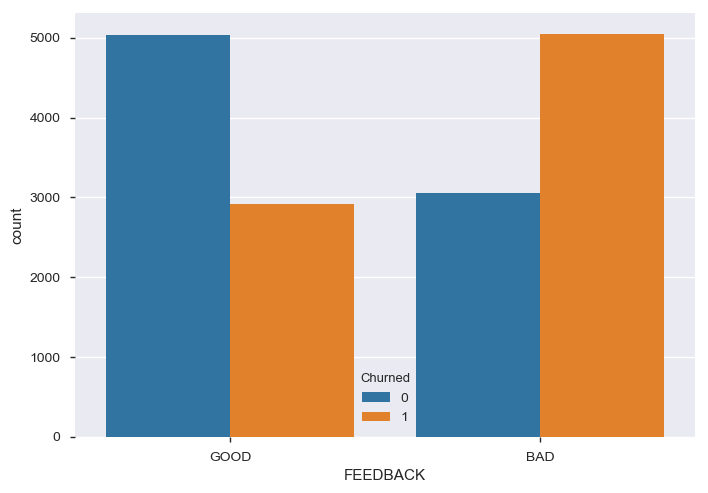

In [401]:
histplot(data['FEEDBACK'])

> ### e. Drop the irrelevant columns

In [402]:
data=data.drop(columns=ir_rel_var)

In [403]:
data.columns

Index(['SITE_ACCOUNT_NUMBER', 'SERVICE_PLAN', 'SALES_CHANNEL', 'SALES_SOURCE',
       'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'MOST_RECENT_SALES_CHANNEL',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'Churned', 'First_comm_year', 'Upgrade_year'],
      dtype='object')

> ### f. DataCleansing

####    i.Drop the rows with all null values

In [404]:
data[data['SITE_ACCOUNT_NUMBER'].isnull()]

,SITE_ACCOUNT_NUMBER,SERVICE_PLAN,SALES_CHANNEL,SALES_SOURCE,FEEDBACK,SATELLITE,SITE_TYPE_DESC,MOST_RECENT_SALES_CHANNEL,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,Churned,First_comm_year,Upgrade_year
9998,NaN,NaN,NaN,NaN,BAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [405]:
data.drop(axis=0,index=9998,inplace=True)

#### ii.Fill missing valuyes with NAN

In [406]:
data=data.fillna(np.NAN)

####  iii.Set the account Number as Index

In [407]:
data.set_index(data['SITE_ACCOUNT_NUMBER'],inplace=True)

In [408]:
data.drop(columns={'SITE_ACCOUNT_NUMBER'},inplace=True)

### iv.Create a new Dataframe to add all modified variables

In [409]:
datax=pd.DataFrame()

#### v. map income to make it numeric and impute missing values with median

In [410]:
data['INCOME'].unique()

array([0, 4, 6, 7, 3, 'A', nan, 5, 'C', 9, 'D', 1, 8, 2, 'B'],
      dtype=object)

In [411]:
imap={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:10,'A':11,'B':12,'C':13,'D':14}

In [412]:
data['INCOME']=data['INCOME'].map(imap)

In [413]:
data['INCOME']=data['INCOME'].fillna(data['INCOME'].median())

In [414]:
datax=datax.join(data['INCOME'],how='outer')

#### vi.Impute missing in Computer Owner

In [415]:
data['COMPUTER_OWNER'].unique()

array(['N', nan, 'Y'], dtype=object)

In [416]:
comap={'N':0,'Y':1}

In [417]:
data['COMPUTER_OWNER']=data['COMPUTER_OWNER'].map(comap)

In [418]:
data['COMPUTER_OWNER']=data["COMPUTER_OWNER"].fillna(1)

In [419]:
data['COMPUTER_OWNER'].unique()

array([0., 1.])

In [420]:
datax=datax.join(data['COMPUTER_OWNER'])

#### vii.Impute Marital Status

In [421]:
data['MARITAL_STATUS'].unique()

array([1.0, 0.0, 2.0, nan, '.'], dtype=object)

    - fill all missing with married i.e. 1

In [422]:
data['MARITAL_STATUS']=np.where(data['MARITAL_STATUS']=='.',1,data['MARITAL_STATUS'])

In [423]:
data['MARITAL_STATUS']=data['MARITAL_STATUS'].fillna(1)

In [424]:
data['MARITAL_STATUS'].unique()

array([1., 0., 2.])

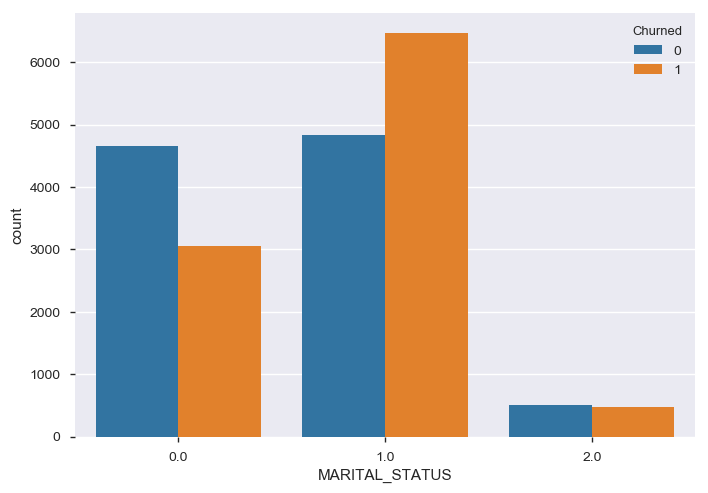

In [425]:
histplot(data['MARITAL_STATUS'])

In [426]:
datax=datax.join(pd.get_dummies(data['MARITAL_STATUS'],prefix='Marital_staus'))

#### vii.Impute missing values in PRESENCE OF CHILDREN with 0

In [427]:
data['PRESENCE_OF_CHILDREN'].unique()

array([ 0.,  1., nan])

In [428]:
data['PRESENCE_OF_CHILDREN']=data['PRESENCE_OF_CHILDREN'].fillna(0)

In [429]:
datax=datax.join(data['PRESENCE_OF_CHILDREN'])

#### viii.make categorical variable FEEDBACK
    -as missing:0 Good:1 Bad:2

In [430]:
data['FEEDBACK']=data['FEEDBACK'].fillna('No reply')

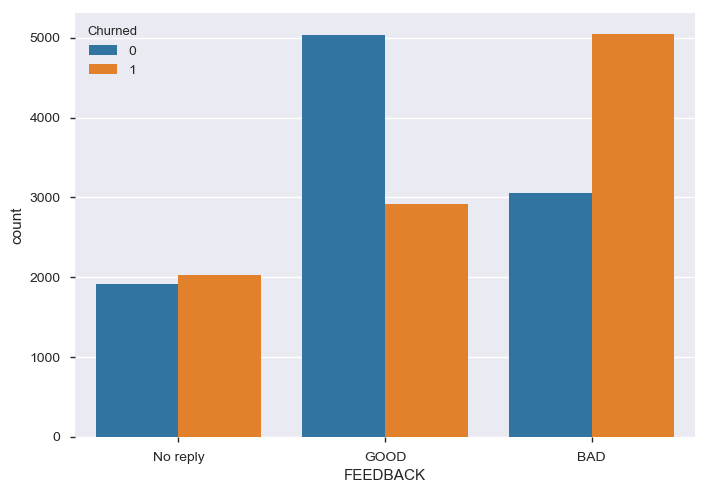

In [431]:
histplot(data['FEEDBACK'])

>> it can be seen that people giving bad feedback ahve highest churn,whulke those giving good feedback have minimum churn

In [432]:
datax=datax.join(pd.get_dummies(data['FEEDBACK'],prefix='feedback'))

#### ix. Create a profile Report again

In [433]:
pandas_profiling.ProfileReport(data)

Number of variables,15
Number of observations,19997
Total Missing (%),3.6%
Total size in memory,2.3 MiB
Average record size in memory,120.0 B
Numeric,3
Categorical,7
Boolean,3
Date,0
Text (Unique),1
Rejected,1


>######    Observations:
    - Since Fisrt_comm_year is highly correlated with Upgrade_year,dont use it in main dataset
    - Sales_source has high cardinality but also is imp factor,so bin it
    - Impute missing values

#### x.adding the Upgrade year in main dataset

In [434]:
data.drop(columns={'First_comm_year'},inplace=True)

In [435]:
data[data['Upgrade_year'].isnull()]

,SERVICE_PLAN,SALES_CHANNEL,SALES_SOURCE,FEEDBACK,SATELLITE,SITE_TYPE_DESC,MOST_RECENT_SALES_CHANNEL,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,Churned,Upgrade_year
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,
AMR-16515542,Power150,NaN,LiveBridge Communications LLC,BAD,0,Spaceway,Classic Migration,8.0,0.0,0.0,0.0,0,NaN
AMR-17894265,NaN,Call Center,NRTC,No reply,G17-HOR-6K,Broadband Remote,HN9000 Upgrade,5.0,1.0,1.0,1.0,0,NaN
AMR-22214969,NaN,NaN,AmericanSat,GOOD,SM5-VER-7K,Broadband Remote,DW6000 Upgrade,6.0,0.0,0.0,1.0,0,NaN
AMR-23693792,Proplus,NaN,InfoDish,BAD,G17-HOR-2K,Broadband Remote,DW6000 Upgrade,7.0,0.0,0.0,0.0,0,NaN
AMR-29523715,Basic,NaN,InfoDish,BAD,AM9-VER-2K,Broadband Remote,Dealer-Generated Sale,0.0,1.0,1.0,0.0,0,NaN
AMR-31888071,Elite,Web orders,Perfect 10,No reply,G17-HOR-6K,Spaceway,DW6000 Upgrade,0.0,1.0,1.0,1.0,0,NaN
AMR-37855083,Pro,Sales Agents,AmericanSat,GOOD,SM5-HOR-6K,Broadband Remote,DPC Classic upgrade,8.0,1.0,1.0,1.0,0,NaN
AMR-41208400,Power150,Web orders,TAG,GOOD,G17-HOR-6K,Broadband Remote,DPC Classic upgrade,6.0,1.0,1.0,0.0,0,NaN
AMR-45091794,Pro,Vars,J & L AND SONS CUSTOM INSTALLATIONS INC,BAD,SM5-VER-5K,Spaceway,Dealer-Generated Sale,9.0,1.0,1.0,1.0,0,NaN


In [436]:
data['Upgrade_year'].value_counts()

2011.0    4451
2004.0    4029
2005.0    3373
2003.0    2956
2010.0    1602
2006.0     993
2007.0     956
2008.0     374
2002.0     292
1902.0      25
2009.0      16
1903.0      16
1901.0      15
2012.0       4
2013.0       4
1904.0       2
2014.0       1
Name: Upgrade_year, dtype: int64

In [437]:
data['Upgrade_year'].fillna('2011.0',inplace=True)

In [438]:
datax=datax.join(data['Upgrade_year'])

#### xi.Manipulating SALES_SOURCE

In [439]:
data['SALES_SOURCE'].value_counts().head(2)

TAG                 2916
Hughes Web Order    1940
Name: SALES_SOURCE, dtype: int64

In [440]:
data['SALES_SOURCE'].fillna('TAG',inplace=True)

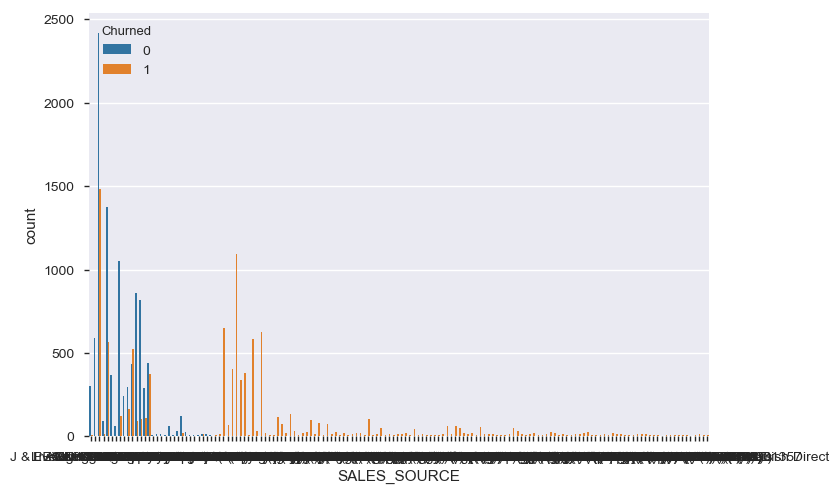

In [441]:
histplot(data['SALES_SOURCE'])

    -Do label encoding and binning

In [442]:
data['SALES_SOURCE_labelled']=le.fit_transform(data['SALES_SOURCE'].astype('str'))

In [443]:
data['SALES_SOURCE_labelled']= pd.cut(data['SALES_SOURCE_labelled'],20,labels=range(1,21))

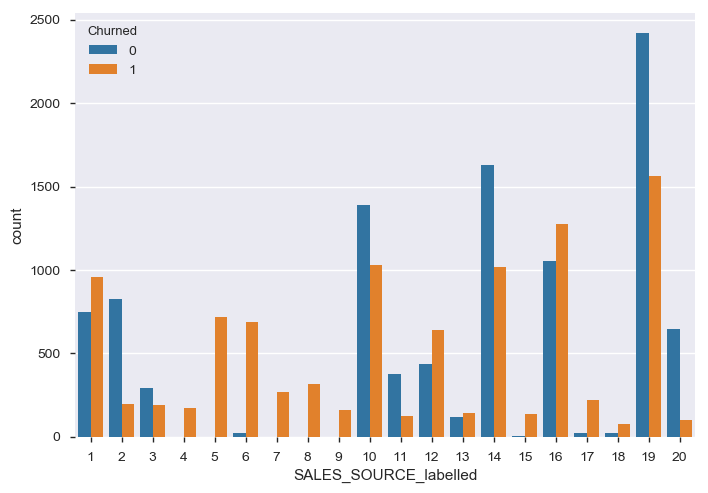

In [444]:
histplot(data['SALES_SOURCE_labelled'])

In [445]:
datax=datax.join(data['SALES_SOURCE_labelled'])

#### xii. Manipulate SATELLITE

In [446]:
data['SATELLITE'].value_counts().head(2)

SPACEWAY3      3844
AM6-HOR-21K    1171
Name: SATELLITE, dtype: int64

In [447]:
data['SATELLITE'].fillna('SPACEWAY3',inplace=True)

In [448]:
data['SATELLITE_l_b']=le.fit_transform(data['SATELLITE'].astype('str'))

In [449]:
data['SATELLITE_l_b']=pd.cut(data['SATELLITE_l_b'],10,labels=range(1,11))

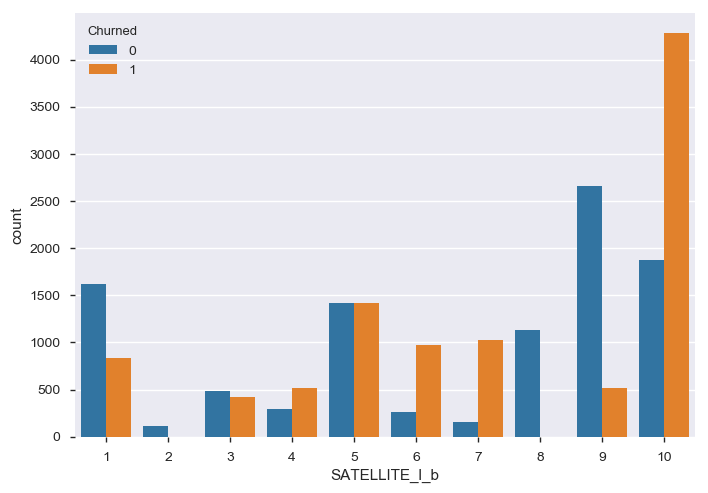

In [450]:
histplot(data['SATELLITE_l_b'])

In [451]:
datax=datax.join(data['SATELLITE_l_b'])

#### xiii. Manipulate SITE_TYPE_DESC

In [452]:
data['SITE_TYPE_DESC'].unique()

array(['Broadband Remote', 'Spaceway', nan], dtype=object)

In [453]:
data.SITE_TYPE_DESC.value_counts()

Broadband Remote    11578
Spaceway             8346
Name: SITE_TYPE_DESC, dtype: int64

In [454]:
data['SITE_TYPE_DESC'].fillna('Broadband Remote',inplace=True)

In [455]:
datax=datax.join(pd.get_dummies(data['SITE_TYPE_DESC'],prefix='SITE_type'))

#### xiv. Manipulate SALES_CHANNEL

In [456]:
data['SALES_CHANNEL'].unique()

array(['Vars', 'Sales Agents', 'Call Center', nan, 'Web orders',
       'Retail/others', 'Retail/Others', 'Web Orders', 'Call Centers'],
      dtype=object)

    - As it is visible ,taht some values have 2 columns due to slight name difference,combine these columns 

In [457]:
smap={'Vars':'Vars', 'Sales Agents':'Sales Agents', 'Call Center':'Call Centers', 'Web orders':'Web Orders',
       'Retail/others':'Retail/Others', 'Retail/Others':'Retail/Others', 'Web Orders':'Web Orders', 'Call Centers':'Call Centers'}

In [458]:
data['SALES_CHANNEL']=data['SALES_CHANNEL'].map(smap)

In [459]:
data.SALES_CHANNEL.value_counts()

Call Centers     3057
Retail/Others    3021
Sales Agents     2825
Web Orders       2810
Vars             2778
Name: SALES_CHANNEL, dtype: int64

In [460]:
data['SALES_CHANNEL'].fillna('Call Centers',inplace=True)

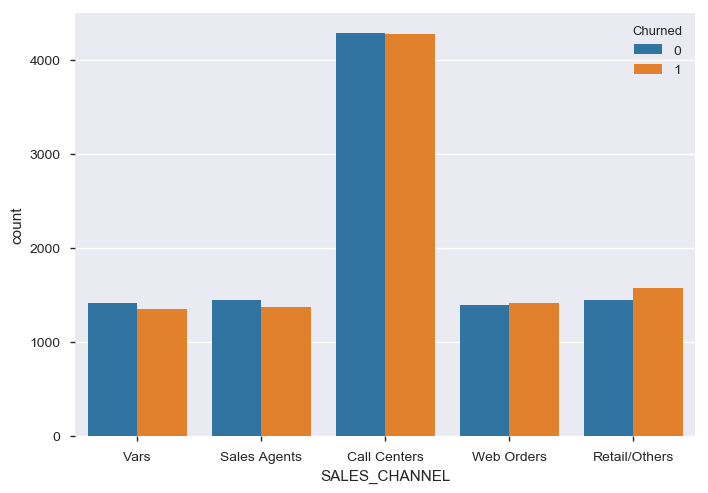

In [461]:
histplot(data['SALES_CHANNEL'])

    -now after combining same values, the SALES_CHANNEL is not required

In [462]:
data.drop(columns={'SALES_CHANNEL'},inplace=True)

#### xv. Manipulate MOST_RECENT_SALES_CHANNEL

In [463]:
data.MOST_RECENT_SALES_CHANNEL.value_counts()

Direct                   5673
Hughes Sales Agents      3825
HN7000 Upgrade           1875
Dealer-Generated Sale    1497
DW6000 Upgrade           1213
DPC Classic upgrade      1069
Retail                    995
HN9000 Upgrade            707
Dealer - Direct Order     623
DW7000 Upgrade            553
National Sales            480
Retail                    368
Used Equipment            305
Classic Migration         259
Dial Return Upgrade       214
UNKNOWN                   110
Distributor Sales Age      77
0                          59
Retail - Direct Order      31
Business Edition           26
EXPRESS REPAIR BASIC       11
Name: MOST_RECENT_SALES_CHANNEL, dtype: int64

In [464]:
data['MOST_RECENT_SALES_CHANNEL'].fillna('UNKNOWN',inplace=True)

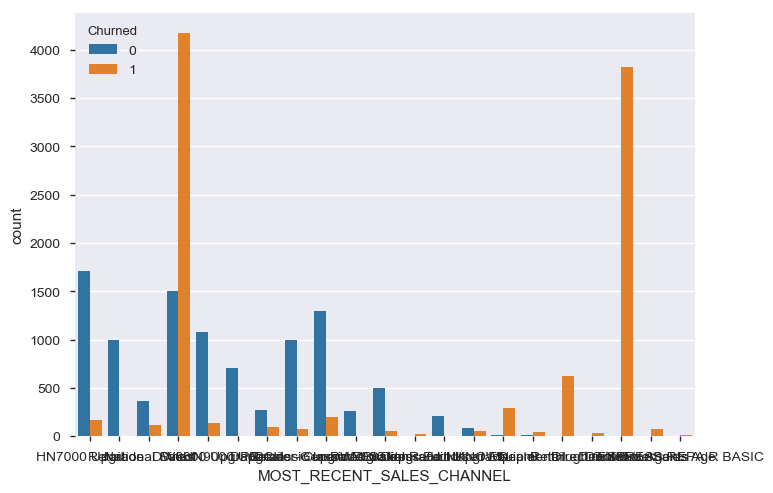

In [465]:
histplot(data['MOST_RECENT_SALES_CHANNEL'])

In [466]:
data['mrsc_label']=le.fit_transform(data['MOST_RECENT_SALES_CHANNEL'].astype('str'))

In [467]:
datax=datax.join(data['mrsc_label'])

#datax=datax.join(pd.get_dummies(data['MOST_RECENT_SALES_CHANNEL'],prefix='mrsc'))

#### xvi. Manipulate SERVICE_PLAN

In [468]:
data.SERVICE_PLAN.value_counts()

Elite                3051
Home                 2365
Proplus              1936
Basic_Ltd            1934
Basic                1886
Pro                  1765
Power150             1248
SO                   1184
Professional          780
Power15               623
Professional Plus     505
Name: SERVICE_PLAN, dtype: int64

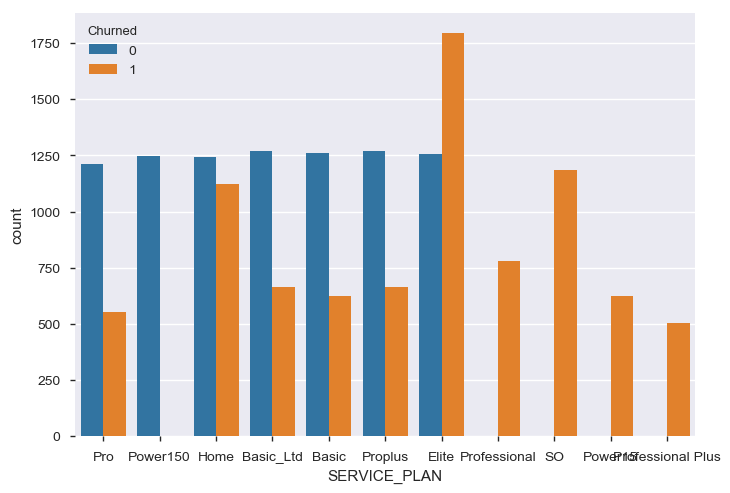

In [469]:
histplot(data['SERVICE_PLAN'])

In [470]:
data['SERVICE_PLAN'].fillna('Elite',inplace=True)

In [471]:
data['SERVICE_PLAN_LABElled']=le.fit_transform(data['SERVICE_PLAN'].astype('str'))

In [472]:
datax=datax.join(data['SERVICE_PLAN_LABElled'])
#datax=datax.join(pd.get_dummies(data['SERVICE_PLAN'],prefix='Serv_plan'))

#### xiii. Add churn to datax

In [473]:
datax=datax.join(data['Churned'])

## 3. Model Building using KNN classifier

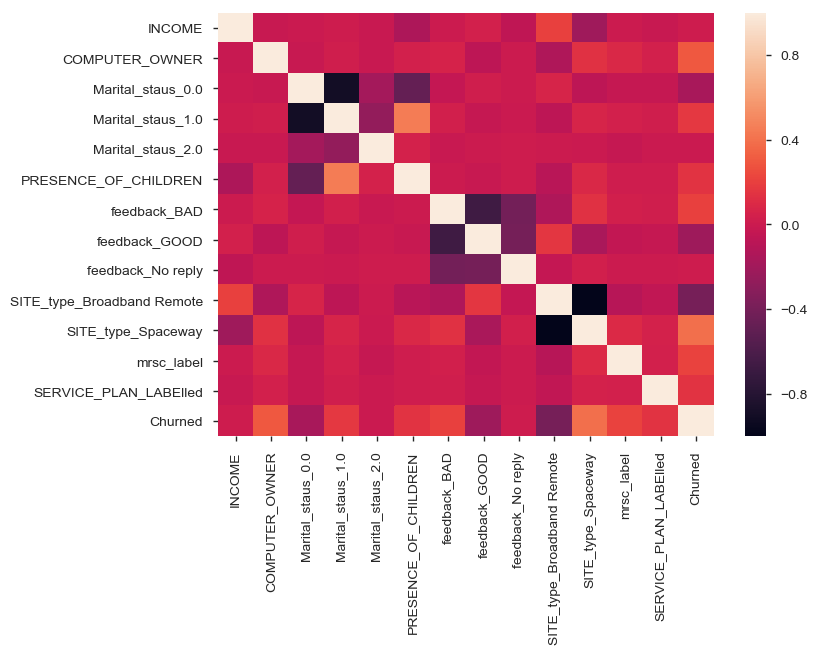

In [474]:
sns.heatmap(datax.corr())

In [475]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# for validation
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_validate,cross_val_score

# for calculating model accuracy 
from sklearn.metrics import accuracy_score, confusion_matrix

### Feature Scaling
    - to get all the data on same scale

In [476]:
datax.columns

Index(['INCOME', 'COMPUTER_OWNER', 'Marital_staus_0.0', 'Marital_staus_1.0',
       'Marital_staus_2.0', 'PRESENCE_OF_CHILDREN', 'feedback_BAD',
       'feedback_GOOD', 'feedback_No reply', 'Upgrade_year',
       'SALES_SOURCE_labelled', 'SATELLITE_l_b', 'SITE_type_Broadband Remote',
       'SITE_type_Spaceway', 'mrsc_label', 'SERVICE_PLAN_LABElled', 'Churned'],
      dtype='object')

In [477]:
X=datax.drop(columns={'Churned'})
Y=datax['Churned']

In [478]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7)

In [479]:
from sklearn.preprocessing import StandardScaler

In [480]:
sc = StandardScaler()

In [481]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [482]:
# Keep random_state for all models =0
rs = 0

In [483]:
models = []
models.append(('LR',LogisticRegression(random_state=rs)))
models.append(('SVC',SVC(random_state=rs)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier(random_state=rs)))
models.append(('RFC',RandomForestClassifier(random_state=rs)))
models.append(('Naive',GaussianNB()))

In [484]:
classifier_name = []
train_score = []
validate_score = []
test_score = []
for name,clf in models:
    classifier_name.append(name)
    clf_train = clf.fit(X_train,Y_train)
    train_score.append(accuracy_score(clf_train.predict(X_train),Y_train))
    test_score.append(accuracy_score(clf_train.predict(X_test),Y_test))

In [485]:
summary = pd.DataFrame()
summary['Model']=classifier_name
summary['Train_score']=train_score
summary['Test_score']=test_score

In [486]:
summary.sort_values(by=['Test_score','Train_score'],ascending=False,inplace=True)

In [487]:
summary

,Model,Train_score,Test_score
4,RFC,0.998428,0.973667
3,DTC,0.999929,0.957667
1,SVC,0.932057,0.922500
2,KNN,0.939701,0.910167
0,LR,0.883404,0.881667
5,Naive,0.792670,0.801167


>### Since,Random Forest has highest Score,we will use it for classification

In [488]:
classifier = RandomForestClassifier()

In [489]:
classifier.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [490]:
y_pred=classifier.predict(X_test)

In [491]:
y_prob = classifier.predict_proba(X_test)

In [492]:
y_prob=pd.DataFrame(y_prob)
y_prob_1=list(y_prob[1])

In [493]:
cm = confusion_matrix(Y_test, y_pred)

In [494]:
cm

array([[2923,   57],
       [ 124, 2896]], dtype=int64)

In [495]:
result = pd.DataFrame()

In [496]:
result['actual']=Y_test
result['pred']=y_pred
result['Prob_predict_1']=y_prob_1

In [497]:
result.head()

,actual,pred,Prob_predict_1
SITE_ACCOUNT_NUMBER,,,
DSS-92935970,1,1,1.0
AMR-91857404,1,1,1.0
AMR-93625950,1,1,0.8
AMR-29465133,0,0,0.1
AMR-17967079,0,0,0.0


Text(67.8611,0.5,'Äctual Values')

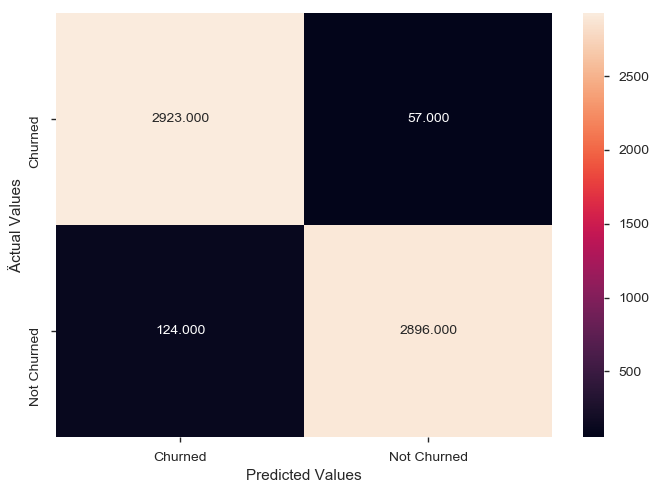

In [498]:
sns.heatmap(cm,annot=True,fmt='.3f',xticklabels=["Churned","Not Churned"], yticklabels=["Churned","Not Churned"])
plt.xlabel("Predicted Values")
plt.ylabel("Äctual Values")

In [499]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2980
          1       0.98      0.96      0.97      3020

avg / total       0.97      0.97      0.97      6000



In [500]:
accuracy_score(Y_test,y_pred)

0.9698333333333333

In [501]:
from sklearn.metrics import roc_auc_score

In [502]:
auc_score = roc_auc_score(result.actual,result.Prob_predict_1)
auc_score

0.9949847215431797

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


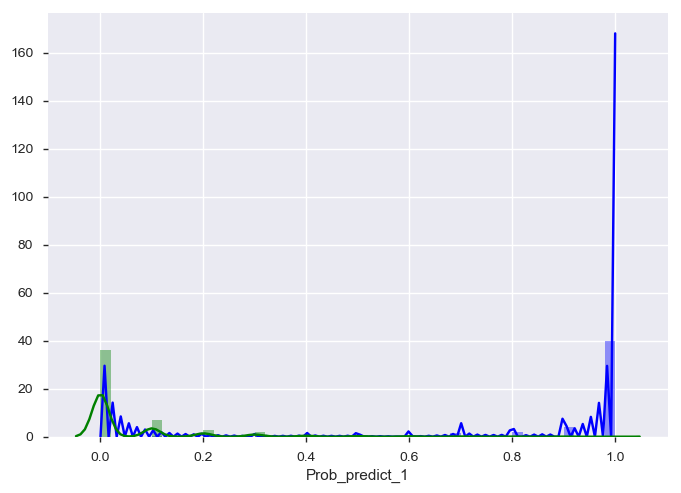

In [503]:
sns.distplot(result[result.actual==1]["Prob_predict_1"],color ='b')
sns.distplot(result[result.actual==0]["Prob_predict_1"],color ='g')

In [504]:
from sklearn.metrics import roc_curve

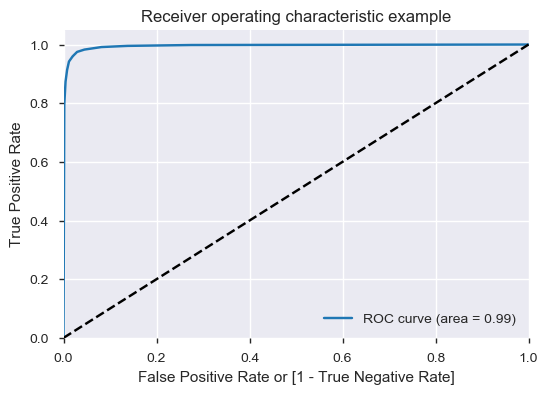

In [505]:
fpr, tpr, thresholds = roc_curve(result.actual,
                                     result.Prob_predict_1,
                                         drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [506]:
feature_imp=classifier.feature_importances_

In [507]:
cols=list(datax.drop(columns={'Churned'}))

In [508]:
feature_importance=pd.DataFrame(list(zip(cols,feature_imp)))

In [509]:
feature_importance

,0,1
0,INCOME,0.033782
1,COMPUTER_OWNER,0.031472
2,Marital_staus_0.0,0.003946
3,Marital_staus_1.0,0.008119
4,Marital_staus_2.0,0.001460
5,PRESENCE_OF_CHILDREN,0.006269
6,feedback_BAD,0.012886
7,feedback_GOOD,0.010112
8,feedback_No reply,0.006606
9,Upgrade_year,0.495259


In [510]:
feature_importance.rename(columns={0:'feature',1:'coeff'},inplace=True)

In [511]:
feature_importance.sort_values(by=['coeff'],ascending=False,axis=0)

,feature,coeff
9,Upgrade_year,0.495259
11,SATELLITE_l_b,0.108060
14,mrsc_label,0.098658
13,SITE_type_Spaceway,0.056620
12,SITE_type_Broadband Remote,0.045805
15,SERVICE_PLAN_LABElled,0.042462
10,SALES_SOURCE_labelled,0.038483
0,INCOME,0.033782
1,COMPUTER_OWNER,0.031472
6,feedback_BAD,0.012886
